In [1]:
import pandas as pd

df = pd.read_csv("data/nana/nana_train_with_alpha3_and_39.csv") 

In [2]:
df

,Name,Nationality,Alpha3,39-leaf
0,Sabra R. Greenhalgh,American,USA,CelticEnglish
1,Philip S. Yu,American,USA,CelticEnglish
2,Paul Gerken,American,USA,CelticEnglish
3,Edward Connelly,American,USA,CelticEnglish
4,Edmund Trowbridge Dana,American,USA,CelticEnglish
...,...,...,...,...
890243,Hiram Cornwall,Dane,DNK,Denmark
890244,Eloise Anderson,Dane,DNK,Denmark
890245,Samuel H. Roys,Dane,DNK,Denmark
890246,John M. Blaska,Dane,DNK,Denmark


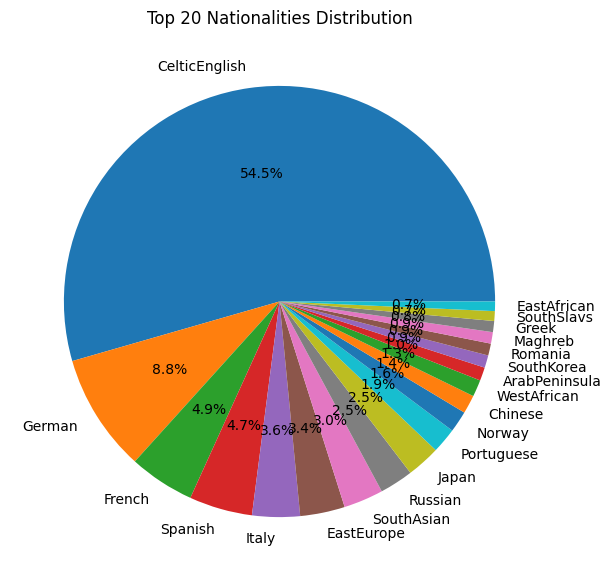

In [3]:
import matplotlib.pyplot as plt
df['39-leaf'].value_counts().head(20).plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.title('Top 20 Nationalities Distribution')
plt.ylabel('')
plt.show()

In [4]:
prompt1 = """
You are given a person's full name. 
Your task is to predict which category from the following 39-leaf taxonomy the name most likely belongs to. 
If no suitable category fits, output exactly 'Other'.

39-leaf taxonomy:
1. CelticEnglish
2. Jewish
3. Greek
4. Nubian
5. Maghreb
6. ArabPeninsula
7. Persian
8. Finland
9. WestAfrican
10. SouthAfrican
11. EastAfrican
12. SouthKorea
13. CentralAsian
14. Turkey
15. Bangladesh
16. Pakistan
17. Denmark
18. Sweden
19. Norway
20. Myanmar
21. SouthAsian
22. Japan
23. Chinese
24. Portuguese
25. Philippines
26. Spanish
27. German
28. Baltics
29. French
30. Russian
31. EastEurope
32. SouthSlavs
33. Cambodia
34. Vietnam
35. Thailand
36. Malaysia
37. Indonesia
38. Romania
39. Italy

Rules:
- Output **only** one of the class names above or 'Other'.
- Base your judgment mainly on linguistic and cultural patterns in the name (spelling, phonetics, typical usage).
- Do not include explanations, punctuation, or any extra words.

Examples:
- Name: "John Smith" → CelticEnglish
- Name: "Nguyen Thi Minh" → Vietnam
- Name: "Ali bin Abdullah" → ArabPeninsula
- Name: "Hiroshi Tanaka" → Japan
- Name: "Fatima Zahra El Mansouri" → Maghreb
- Name: "Arjun Reddy" → SouthAsian
- Name: "Kim Ji-woo" → SouthKorea
- Name: "Ivan Petrov" → Russian
- Name: "Unknown Name" → Other

Full name: {}
"""

In [5]:
prompt1_1 = """
You are given a person's full name. 
Your task is to predict which category from the following 39-leaf taxonomy the name most likely belongs to. 

39-leaf taxonomy:
1. CelticEnglish
2. Jewish
3. Greek
4. Nubian
5. Maghreb
6. ArabPeninsula
7. Persian
8. Finland
9. WestAfrican
10. SouthAfrican
11. EastAfrican
12. SouthKorea
13. CentralAsian
14. Turkey
15. Bangladesh
16. Pakistan
17. Denmark
18. Sweden
19. Norway
20. Myanmar
21. SouthAsian
22. Japan
23. Chinese
24. Portuguese
25. Philippines
26. Spanish
27. German
28. Baltics
29. French
30. Russian
31. EastEurope
32. SouthSlavs
33. Cambodia
34. Vietnam
35. Thailand
36. Malaysia
37. Indonesia
38. Romania
39. Italy

Rules:
- Output **only** one of the class names above.
- Base your judgment mainly on linguistic and cultural patterns in the name (spelling, phonetics, typical usage).
- Do not include explanations, punctuation, or any extra words.

Examples:
- Name: "John Smith" → CelticEnglish
- Name: "Nguyen Thi Minh" → Vietnam
- Name: "Ali bin Abdullah" → ArabPeninsula
- Name: "Hiroshi Tanaka" → Japan
- Name: "Fatima Zahra El Mansouri" → Maghreb
- Name: "Arjun Reddy" → SouthAsian
- Name: "Kim Ji-woo" → SouthKorea
- Name: "Ivan Petrov" → Russian

Full name: {}
"""

In [ ]:
prompt2 = """Given a person's full name, choose exactly ONE class from this closed set of 39 categories and return a single-line JSON object.

ALLOWED_LABELS (exact spelling/casing):
["CelticEnglish","Jewish","Greek","Nubian","Maghreb","ArabPeninsula","Persian","Finland","WestAfrican","SouthAfrican","EastAfrican","SouthKorea","CentralAsian","Turkey","Bangladesh","Pakistan","Denmark","Sweden","Norway","Myanmar","SouthAsian","Japan","Chinese","Portuguese","Philippines","Spanish","German","Baltics","French","Russian","EastEurope","SouthSlavs","Cambodia","Vietnam","Thailand","Malaysia","Indonesia","Romania","Italy"]

TASK
- Input: a full name string.
- Output: one line of JSON ONLY, matching this schema:
  {{"label":"<one of ALLOWED_LABELS>","confidence":<float between 0 and 1 inclusive>}}
- Do not output explanations, extra fields, punctuation outside JSON, or multiple lines.
- If uncertain, pick the MOST LIKELY label based on linguistic/onomastic cues (orthography, morphology, phonotactics, common particles, diacritics, transliteration patterns). NEVER output anything outside ALLOWED_LABELS.
- confidence reflects your subjective probability for the chosen label. Use 2 decimal places (e.g., 0.81). Do not use percentages.

VALIDATION RULES (must always hold)
1) label ∈ ALLOWED_LABELS exactly.
2) 0.00 ≤ confidence ≤ 1.00, two decimals.
3) Output is a single JSON object with exactly these two keys, in this order.

EXAMPLES (format only; do not copy names into training):
Input: "John Smith"
Output: {{"label":"CelticEnglish","confidence":0.86}}

Input: "Nguyen Thi Minh"
Output: {{"label":"Vietnam","confidence":0.95}}

Input: "Ali bin Abdullah"
Output: {{"label":"ArabPeninsula","confidence":0.92}}

INPUT
Full name: {}

NOW RETURN JSON ONLY."""


In [ ]:
from openai import OpenAI
import time

client = OpenAI(api_key="")

def nationality_prediction_openai(fullname, model_type, user_prompt):
    """Send one prediction request and return model output safely."""
    try:
        response = client.chat.completions.create(
            model=model_type,
            messages=[
                {"role": "system", "content": "You are an expert in demography."},
                {"role": "user", "content": user_prompt.format(fullname)},
            ],
        )
        return response.choices[0].message.content
        # return response
    except Exception as e:
        print(f"Error for '{fullname}': {e}")
        time.sleep(30)
        try:
            # one retry after waiting
            response = client.chat.completions.create(
                model=model_type,
                messages=[
                    {"role": "system", "content": "You are an expert in demography."},
                    {"role": "user", "content": user_prompt.format(fullname)},
                ],
            )
            return response.choices[0].message.content
        except Exception as e2:
            print(f"Retry failed for '{fullname}': {e2}")
            return None

In [ ]:
import anthropic
import time

API_KEY = ""

# Initialize the client
client = anthropic.Anthropic(
    api_key=API_KEY
)

def nationality_prediction_claude(fullname, model_type, user_prompt):
    try:
        message = client.messages.create(
            model=model_type,
            max_tokens=1024,
            messages=[
                {
                    "role": "user",
                    "content": user_prompt.format(fullname)
                }
            ]
        )
        print(dir(message))
        print(dir(message.content[0]))
        return message.content[0].text
    except Exception as e:
        print(f"Error for '{fullname}': {e}")
        time.sleep(30)
        try:
            message = client.messages.create(
                model=model_type,
                max_tokens=1024,
                messages=[
                    {
                        "role": "user",
                        "content": user_prompt.format(fullname)
                    }
                ]
            )
            return message.content[0].text
        except Exception as e2:
            print(f"Retry failed for '{fullname}': {e2}")
            return None

In [ ]:
import requests, math, time
api_key = ""
def nationality_prediction_openai_with_logprobs(fullname, model_type, user_prompt_template, max_retries=5):
    url = "https://api.openai.com/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json",
    }

    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": user_prompt_template.format(fullname)}
    ]

    payload = {
        "model": model_type,
        "messages": messages,
        "logprobs": True,
        "top_logprobs": 5
    }

    for attempt in range(max_retries):
        try:
            response = requests.post(url, json=payload, headers=headers)
            if response.status_code == 429:
                wait_time = (2 ** attempt) + 1  # exponential backoff
                print(f"⚠️ Rate limit hit. Waiting {wait_time:.1f}s before retry ({attempt+1}/{max_retries})...")
                time.sleep(wait_time)
                continue
            response.raise_for_status()
            data = response.json()
            choice = data["choices"][0]
            result = {"text": choice["message"]["content"].strip()}
            if "logprobs" in choice and choice["logprobs"]:
                result["logprobs"] = choice["logprobs"]["content"]
            # return result['text'] + ',' + str(math.exp(result["logprobs"][0]["logprob"]))
            return result
        except requests.exceptions.RequestException as e:
            wait_time = (2 ** attempt) + 1
            print(f"⚠️ Request failed ({e}). Retrying in {wait_time}s...")
            time.sleep(wait_time)

    print("❌ Failed after multiple retries. Skipping this name.")
    return None


In [7]:
import time

def predict_and_save(df, name_col, model_type, user_prompt, output_path, start_index=0):
    """Predict nationality for each name and auto-save every 100 lines."""
    client = OpenAI(api_key="YOUR_API_KEY_HERE")
    df = df.copy().reset_index(drop=True)

    if start_index > 0:
        print(f"Resuming from index {start_index}")

    for i in range(start_index, len(df)):
        fullname = df.iloc[i][name_col]
        prediction = nationality_prediction_openai(fullname, model_type, user_prompt)
        # prediction = nationality_prediction_claude(fullname, model_type, user_prompt)
        # prediction = nationality_prediction_openai_with_logprobs(fullname, model_type, user_prompt)
        df.loc[i, "39-leaf-pred"] = prediction

        # save every 100 lines
        if (i + 1) % 100 == 0 or i == len(df) - 1:
            print(f"Saving progress at row {i+1}...")
            df.head(i + 1).to_csv(output_path, index=False)
            time.sleep(1)

    print("All predictions complete and saved.")
    return df

In [18]:
print(nationality_prediction_openai_with_logprobs("Cong Ming", "gpt-4o", prompt1))

{'text': 'Chinese', 'logprobs': [{'token': 'Chinese', 'logprob': -0.0005523175350390375, 'bytes': [67, 104, 105, 110, 101, 115, 101], 'top_logprobs': [{'token': 'Chinese', 'logprob': -0.0005523175350390375, 'bytes': [67, 104, 105, 110, 101, 115, 101]}, {'token': 'China', 'logprob': -8.0005521774292, 'bytes': [67, 104, 105, 110, 97]}, {'token': 'Vietnam', 'logprob': -8.7505521774292, 'bytes': [86, 105, 101, 116, 110, 97, 109]}, {'token': 'Other', 'logprob': -9.7505521774292, 'bytes': [79, 116, 104, 101, 114]}, {'token': 'East', 'logprob': -15.1255521774292, 'bytes': [69, 97, 115, 116]}]}]}


In [8]:
print(nationality_prediction_openai("Cong Ming", "gpt-4o", prompt1))

ChatCompletion(id='chatcmpl-CSsXgk3ZokA2sI2imS9cl4MLNYF7d', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Chinese', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760998880, model='gpt-4o-2024-08-06', object='chat.completion', service_tier='default', system_fingerprint='fp_cbf1785567', usage=CompletionUsage(completion_tokens=1, prompt_tokens=416, total_tokens=417, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))


In [ ]:
print(nationality_prediction_claude("Cong Ming", "claude-sonnet-4-5-20250929", prompt1))

In [10]:
sampled_df = df.sample(n=1000, random_state=42)
sampled_df

,Name,Nationality,Alpha3,39-leaf
134847,John Hazelwood,American,USA,CelticEnglish
843867,Alf Valentine,Jamaican,JAM,CelticEnglish
753077,Dan Coe,Romanian,ROU,Romania
861048,Nur Diansyah,Indonesian,IDN,Indonesia
358603,Ioan James,English,GBR,CelticEnglish
...,...,...,...,...
4088,Helen Bina,American,USA,CelticEnglish
336420,Michael Meyer,English,GBR,CelticEnglish
808750,Anderson Roberto da Silva Luiz,Brazilian,BRA,Portuguese
8924,James Henretta,American,USA,CelticEnglish


In [12]:
output_path = "result/nana/nana_nationality_predictions_1000_4o_prompt1_1.csv"

sampled_df = predict_and_save(
    df=sampled_df,
    name_col="Name",
    model_type="gpt-4o-mini",
    user_prompt=prompt1_1,
    output_path=output_path
)

Saving progress at row 100...
Saving progress at row 200...
Saving progress at row 300...
Saving progress at row 400...
Saving progress at row 500...
Saving progress at row 600...
Saving progress at row 700...
Saving progress at row 800...
Saving progress at row 900...
Saving progress at row 1000...
All predictions complete and saved.
